# Task 6. Binary Logistic Regression

File **bank-additional-full.csv** contains records relevant to a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

[Source](https://www.kaggle.com/code/kerneler/starter-bank-additional-full-csv-f1e01875-e)

**Variables:**

Bank client data
- age (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (categorical)
- housing: has housing loan? (categorical)
- loan: has personal loan? (categorical)

Related with the last contact of the current campaign
- contact: contact communication type (categorical)
- month: last contact month of year (categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric). 
*! Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

Other attributes
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target)
- y - has the client subscribed a term deposit? (binary: 'yes','no')

Please complete the following tasks.

1. Select not less than 9 predictors. Out of them at least 3 predictors should be categorical. Prove that the selected predictors could be used simultaneously in one binary regression model. Formulate the research hypotheses which will be verified during the regression analysis.

In [122]:
# your code here

# i have replaced all ; to , at csv to fix it 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
import warnings
from scipy.stats import pointbiserialr
warnings.filterwarnings('ignore')



df = pd.read_csv('bank-additional-full.csv', )
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [124]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [125]:
# so we start our analysis with dependent variable exploration.

df['y'].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [126]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [127]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age' 'duration' 'campaign' 'pdays' 'previous']

Type: object
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']

Type: float64
['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']



In [128]:
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'poutcome', 'y']

In [129]:
df[num_vars]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [130]:
# vry long thing
# sns.pairplot(df, hue='y')

In [131]:
# lets choose numeric variables


In [132]:


# если y в формате 'yes'/'no' — переводим в 0/1
if set(df['y'].dropna().unique()) & {'yes','no'}:
    df['y'] = df['y'].map({'yes':1, 'no':0})

# 1. Числовые колонки (кроме y)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'y' in num_cols:
    num_cols.remove('y')

# 2. Point-biserial для каждой числовой переменной
rows = []
for col in num_cols:
    sub = df[['y', col]].dropna()
    n = len(sub)
    if n < 10:
        rows.append((col, np.nan, np.nan, n))
        continue
    r, p = pointbiserialr(sub['y'], sub[col])
    rows.append((col, r, p, n))

res = pd.DataFrame(rows, columns=['var','r_pb','pvalue','n'])

# 3. Добавляем abs(r) и сортируем кандидатов по |r_pb| (по убыванию)
res['abs_r'] = res['r_pb'].abs()

# 4. Правило отбора: p < 0.05, затем сортировка по abs_r desc
cand = res[res['pvalue'] < 0.05].sort_values('abs_r', ascending=False).reset_index(drop=True)
selected_sorted_by_abs = cand['var'].tolist()

# 5. Вывод

print("\nCandidates (p < 0.05) sorted by |r_pb| (desc):")
print(cand[['var','r_pb','pvalue','n','abs_r']].to_string(index=False))
print("\nSelected numeric predictors (sorted by |r_pb|):")
print(selected_sorted_by_abs)


df['y'] = df['y'].map({1: 'yes', 0: 'no'})



Candidates (p < 0.05) sorted by |r_pb| (desc):
           var      r_pb        pvalue     n    abs_r
      duration  0.405274  0.000000e+00 41188 0.405274
   nr.employed -0.354678  0.000000e+00 41188 0.354678
         pdays -0.324914  0.000000e+00 41188 0.324914
     euribor3m -0.307771  0.000000e+00 41188 0.307771
  emp.var.rate -0.298334  0.000000e+00 41188 0.298334
      previous  0.230181  0.000000e+00 41188 0.230181
cons.price.idx -0.136211 9.318965e-170 41188 0.136211
      campaign -0.066357  2.007780e-41 41188 0.066357
 cons.conf.idx  0.054878  7.536665e-29 41188 0.054878
           age  0.030399  6.802136e-10 41188 0.030399

Selected numeric predictors (sorted by |r_pb|):
['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'cons.price.idx', 'campaign', 'cons.conf.idx', 'age']


<Axes: >

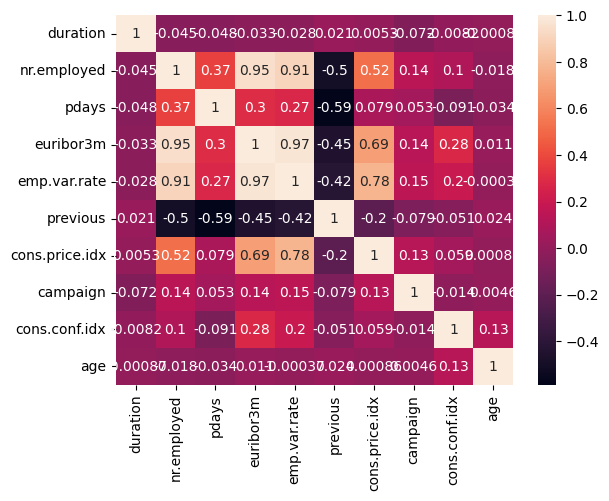

In [133]:
sns.heatmap(df[selected_sorted_by_abs].corr(), annot=True)

In [134]:
# did not take 'euribor3m', 'previous' 'emp.var.rate' 'cons.price.idx' and others because of high corr with other selected 
# Numeric variables are selected by a greedy algorithm, looking for highest corr with y and smallest corr with other numeric vars

selected_num_vars = ['duration', 'nr.employed' , 'pdays', 'campaign', 'cons.conf.idx', 'age']


df[selected_num_vars]

,duration,nr.employed,pdays,campaign,cons.conf.idx,age
0,261,5191.0,999,1,-36.4,56
1,149,5191.0,999,1,-36.4,57
2,226,5191.0,999,1,-36.4,37
3,151,5191.0,999,1,-36.4,40
4,307,5191.0,999,1,-36.4,56
...,...,...,...,...,...,...
41183,334,4963.6,999,1,-50.8,73
41184,383,4963.6,999,1,-50.8,46
41185,189,4963.6,999,2,-50.8,56
41186,442,4963.6,999,1,-50.8,44


Категориальные кандидаты: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


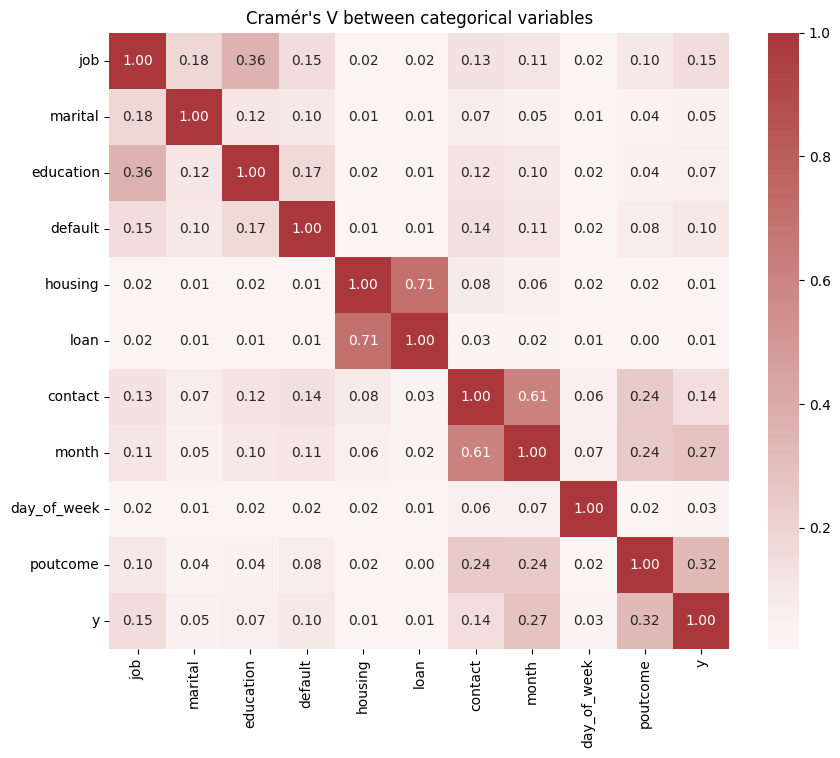

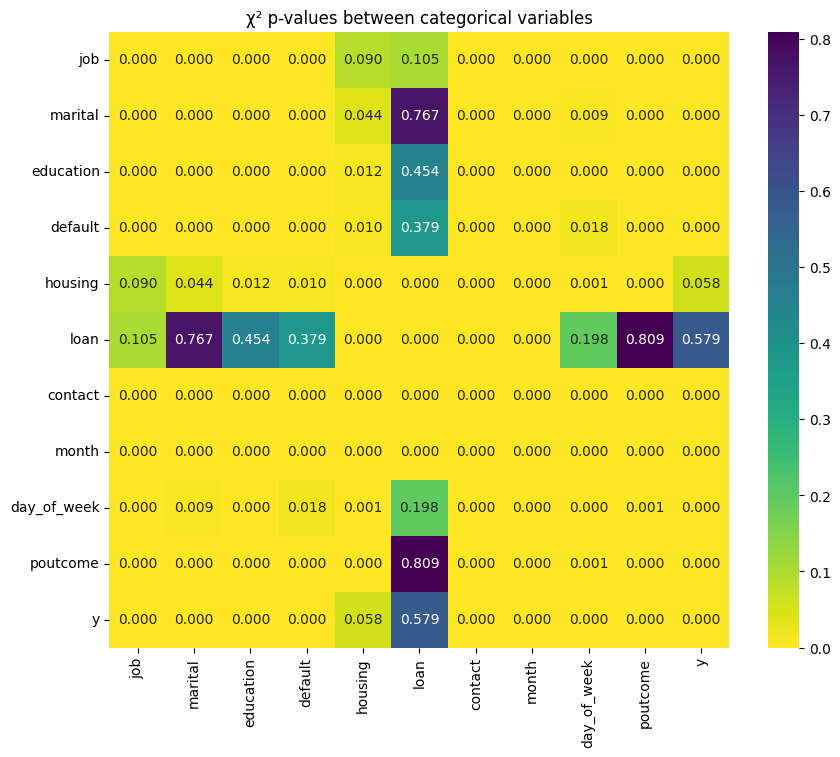

In [135]:
from scipy.stats import chi2_contingency
import math



# Параметры
min_level_pct = 0.01   # уровни < 1% -> объединяются в 'Other' (можно изменить)
cat_corr_cutoff = 0.7  # рекомендованный порог Cramér's V для считать сильной связь

# --- утилиты ---
def merge_rare_levels(s, min_pct=min_level_pct):
    """Собирает редкие уровни в 'Other' по относительной частоте."""
    s = s.astype(str).copy()
    freqs = s.value_counts(normalize=True)
    rare = freqs[freqs < min_pct].index
    if len(rare) == 0:
        return s
    return s.replace({val: 'Other' for val in rare})

def cramers_v(x, y):
    """Cramér's V между двумя категориальными сериями."""
    table = pd.crosstab(x, y)
    if table.size == 0:
        return np.nan
    chi2, p, dof, ex = chi2_contingency(table, correction=False)
    n = table.sum().sum()
    min_dim = min(table.shape)  # min(rows, cols)
    if n == 0 or min_dim <= 1:
        return 0.0
    return math.sqrt(chi2 / (n * (min_dim - 1)))

# 1) определить категориальные колонки (object / category / строковые)
cat_cols = [c for c in df.columns
            if (df[c].dtype == 'object' or str(df[c].dtype).startswith('category'))]

# если нужно исключить y (или другие колонки) — уберите их отсюда
# cat_cols = [c for c in cat_cols if c != 'y']
print("Категориальные кандидаты:", cat_cols)

# 2) подготовим DataFrame с объединёнными редкими уровнями (чтобы все пары считались одинаково)
df_cat = pd.DataFrame()
for c in cat_cols:
    df_cat[c] = merge_rare_levels(df[c], min_pct=min_level_pct)

# 3) инициализация матриц
n = len(cat_cols)
p_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols)
v_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols)

# 4) парные χ² и Cramér's V
for i, a in enumerate(cat_cols):
    for j, b in enumerate(cat_cols):
        if j < i:
            # зеркальность
            p_mat.loc[a,b] = p_mat.loc[b,a]
            v_mat.loc[a,b] = v_mat.loc[b,a]
            continue
        # crosstab
        table = pd.crosstab(df_cat[a], df_cat[b])
        # если таблица пустая (редко) — пропускаем
        if table.size == 0:
            p_val = np.nan
            v = np.nan
        else:
            try:
                chi2, p_val, dof, expected = chi2_contingency(table, correction=False)
            except Exception:
                p_val = np.nan
            v = cramers_v(df_cat[a], df_cat[b])
        p_mat.loc[a,b] = p_val
        v_mat.loc[a,b] = v

# 5) аккуратно отформатируем
p_mat = p_mat.astype(float)
v_mat = v_mat.astype(float)


# 6) Heatmaps (V матрица полезнее для практических решений)
plt.figure(figsize=(10,8))
sns.heatmap(v_mat.astype(float), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title("Cramér's V between categorical variables")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(p_mat.astype(float), annot=True, fmt='.3f', cmap='viridis_r')
plt.title("χ² p-values between categorical variables")
plt.show()



In [136]:
# lets get sorted cramers v of each var with y


s_y = df['y'].astype(str)
rows_vy = []
for c in cat_cols:
    v_y = cramers_v(df_cat[c], s_y)
   
    rows_vy.append((c, v_y))

v_with_y_df = pd.DataFrame(rows_vy, columns=['var','cramers_v_with_y']).sort_values('cramers_v_with_y', ascending=False).reset_index(drop=True)
print("\nCramér's V каждой категориальной переменной относительно y (отсортировано по убыванию):")
print(v_with_y_df.to_string(index=False))



Cramér's V каждой категориальной переменной относительно y (отсортировано по убыванию):
        var  cramers_v_with_y
          y          1.000000
   poutcome          0.320488
      month          0.274395
        job          0.152768
    contact          0.144773
    default          0.099354
  education          0.068472
    marital          0.054570
day_of_week          0.025195
    housing          0.011748
       loan          0.005154


In [137]:
# did not take 'month' 
# cat variables are selected by a greedy algorithm, looking for highest corr with y and smallest corr with other numeric vars, also considering p - value


selected_col_vars = ['poutcome', 'job', 'contact', 'default']

df[selected_col_vars]

,poutcome,job,contact,default
0,nonexistent,housemaid,telephone,no
1,nonexistent,services,telephone,unknown
2,nonexistent,services,telephone,no
3,nonexistent,admin.,telephone,no
4,nonexistent,services,telephone,no
...,...,...,...,...
41183,nonexistent,retired,cellular,no
41184,nonexistent,blue-collar,cellular,no
41185,nonexistent,retired,cellular,no
41186,nonexistent,technician,cellular,no


2. Build a binary logistic regression model. Dependent variable is `y`. Specify the regression equation (at least the linear part of it). Assess the goodness-of-fit of the model (statistical significance, accuracy, AUC). Create the ROC curve and describe it.

In [138]:
# your code here

df[selected_col_vars] = df[selected_col_vars].astype('category')
dummies = pd.get_dummies(df[selected_col_vars], drop_first=True, dtype=int)

X = pd.concat([df[selected_num_vars].copy(), dummies], axis=1)
y = df['y'].map({'yes':1, 'no':0})

dummies

,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
41184,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
41185,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
41186,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [139]:
X

,duration,nr.employed,pdays,campaign,cons.conf.idx,age,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
0,261,5191.0,999,1,-36.4,56,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,149,5191.0,999,1,-36.4,57,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,226,5191.0,999,1,-36.4,37,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,151,5191.0,999,1,-36.4,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,307,5191.0,999,1,-36.4,56,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,4963.6,999,1,-50.8,73,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41184,383,4963.6,999,1,-50.8,46,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41185,189,4963.6,999,2,-50.8,56,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41186,442,4963.6,999,1,-50.8,44,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [140]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [141]:
x_mult_constant = sm.add_constant(X)

model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())


         Current function value: 0.216669
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41165
Method:                           MLE   Df Model:                           22
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.3845
Time:                        00:03:08   Log-Likelihood:                -8924.2
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   64.4692      1.498     43.045      0.000      61.534      67.405
duration                 0.0045   7

In [ ]:
# regression equation 

l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = 64.469228 + 0.00*duration + -0.01*nr.employed + -0.00*pdays + -0.04*campaign + 0.03*cons.conf.idx + -0.00*age + 0.56*poutcome_nonexistent + 0.98*poutcome_success + -0.46*job_blue-collar + -0.25*job_entrepreneur + -0.12*job_housemaid + -0.07*job_management + 0.32*job_retired + -0.13*job_self-employed + -0.32*job_services + 0.26*job_student + -0.07*job_technician + -0.00*job_unemployed + 0.00*job_unknown + -0.68*contact_telephone + -0.40*default_unknown + -27.26*default_yes


goodness of fit of the model

In [143]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.384512
Model significance = 0.000000


In [144]:


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
duration,0.000,significant
nr.employed,0.000,significant
pdays,0.000,significant
campaign,0.000,significant
cons.conf.idx,0.000,significant
age,0.774,non-significant
poutcome_nonexistent,0.000,significant
poutcome_success,0.000,significant
job_blue-collar,0.000,significant


In [145]:
f'Statistically significant model parameters: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['const' 'duration' 'nr.employed' 'pdays' 'campaign' 'cons.conf.idx'\n 'poutcome_nonexistent' 'poutcome_success' 'job_blue-collar'\n 'job_entrepreneur' 'job_retired' 'job_services' 'job_student'\n 'contact_telephone' 'default_unknown']"

In [146]:
f'Statistically nonsignificant model parameters: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['age' 'job_housemaid' 'job_management' 'job_self-employed'\n 'job_technician' 'job_unemployed' 'job_unknown' 'default_yes']"

ROC curve

In [147]:
fpr, tpr, _ = roc_curve(y, model1.predict())
roc_auc = auc(fpr, tpr)

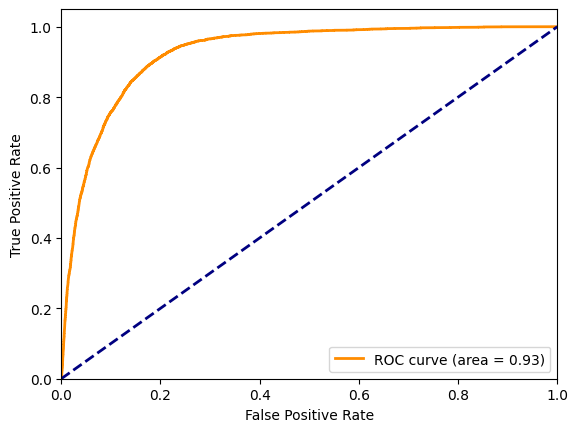

In [148]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# roc curve descripiton

3. Assess the statistical significance of the regression coefficients. Describe the relationships between each predictor and dependent variable in detail. This is very important point of the task. We should understand clearly from the analysis which predictors influence the choice of the clients and how.

In [149]:
# your code here


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
duration,0.000,significant
nr.employed,0.000,significant
pdays,0.000,significant
campaign,0.000,significant
cons.conf.idx,0.000,significant
age,0.774,non-significant
poutcome_nonexistent,0.000,significant
poutcome_success,0.000,significant
job_blue-collar,0.000,significant


In [150]:
res = model1
ci = res.conf_int()
res_table = pd.DataFrame({
    'coef': res.params,
    'std_err': res.bse,
    'z': res.tvalues,
    'p_value': res.pvalues,
    'ci_low': ci[0],
    'ci_high': ci[1],
})
res_table['odds'] = np.exp(res_table['coef'])
res_table['odds_ci_low'] = np.exp(res_table['ci_low'])
res_table['odds_ci_high'] = np.exp(res_table['ci_high'])

print("\n=== Coefficients, standard errors, z, p and OR (exp(coef)) ===")
print(res_table.round(4))

# ----------------- average marginal effects (AME) -----------------
try:
    me = res.get_margeff(method='dydx', at='overall')
    me_df = me.summary_frame().rename(columns={'dy/dx':'ame','Std.Err':'ame_se','P>|z|':'ame_p'})
except Exception:
    me_df = None

# ----------------- simple textual interpretations (English) -----------------
alpha = 0.05
print("\n=== Textual interpretations for each predictor ===\n")

for var in res_table.index:
    if var == 'const':
        continue
    row = res_table.loc[var]
    p = row['p_value']
    sign = 'positive' if row['coef'] > 0 else ('negative' if row['coef'] < 0 else 'zero')
    signif = 'significant (p < 0.05)' if p < alpha else f'not significant (p = {p:.3f})'
    # interpret via OR
    or_pct = (row['odds'] - 1) * 100  # percent change in odds for +1 unit
    or_text = f"OR={row['odds']:.3f} (CI [{row['odds_ci_low']:.3f}, {row['odds_ci_high']:.3f}])"
    # marginal effect, if available
    me_text = ""
    if me_df is not None and var in me_df.index:
        ame = me_df.loc[var, 'ame']
        me_text = f" Average marginal effect: ΔP ≈ {ame:.4f} ."
    # make readable string
    # detect dummy-levels (names with '_') and categorical variables
    if '_' in var and any(v in var for v in cat_vars):
        base = var.split('_')[0]
        level = var[len(base)+1:]
        print(f"Level {base}='{level}' vs base: coef={row['coef']:.4f}, {signif}. {or_text}.{me_text}")
    else:
        print(f"Variable '{var}': coef={row['coef']:.4f}, sign={sign}, {signif}. {or_text}.{me_text}")



=== Coefficients, standard errors, z, p and OR (exp(coef)) ===
                         coef       std_err        z  p_value        ci_low  \
const                 64.4692  1.497700e+00  43.0452   0.0000  6.153380e+01   
duration               0.0045  1.000000e-04  63.3056   0.0000  4.400000e-03   
nr.employed           -0.0129  3.000000e-04 -43.3137   0.0000 -1.340000e-02   
pdays                 -0.0009  2.000000e-04  -4.7578   0.0000 -1.300000e-03   
campaign              -0.0431  1.150000e-02  -3.7474   0.0002 -6.560000e-02   
cons.conf.idx          0.0302  3.600000e-03   8.4644   0.0000  2.320000e-02   
age                   -0.0006  2.200000e-03  -0.2878   0.7735 -4.800000e-03   
poutcome_nonexistent   0.5629  6.240000e-02   9.0238   0.0000  4.406000e-01   
poutcome_success       0.9799  1.998000e-01   4.9037   0.0000  5.883000e-01   
job_blue-collar       -0.4569  6.390000e-02  -7.1494   0.0000 -5.822000e-01   
job_entrepreneur      -0.2513  1.217000e-01  -2.0642   0.0390 -4.89


=== Textual interpretations for each predictor ===

Variable 'duration': coef=0.0045, sign=positive, significant (p < 0.05). OR=1.005 (CI [1.004, 1.005]). Average marginal effect: ΔP ≈ 0.0003 .
Variable 'nr.employed': coef=-0.0129, sign=negative, significant (p < 0.05). OR=0.987 (CI [0.987, 0.988]). Average marginal effect: ΔP ≈ -0.0008 .
Variable 'pdays': coef=-0.0009, sign=negative, significant (p < 0.05). OR=0.999 (CI [0.999, 0.999]). Average marginal effect: ΔP ≈ -0.0001 .
Variable 'campaign': coef=-0.0431, sign=negative, significant (p < 0.05). OR=0.958 (CI [0.937, 0.980]). Average marginal effect: ΔP ≈ -0.0027 .
Variable 'cons.conf.idx': coef=0.0302, sign=positive, significant (p < 0.05). OR=1.031 (CI [1.024, 1.038]). Average marginal effect: ΔP ≈ 0.0019 .
Variable 'age': coef=-0.0006, sign=negative, not significant (p = 0.774). OR=0.999 (CI [0.995, 1.004]). Average marginal effect: ΔP ≈ -0.0000 .
Level poutcome='nonexistent' vs base: coef=0.5629, significant (p < 0.05). OR=1.75

4. Do the model diagnostics. Conduct cross-validation of the model and describe the results obtained.

In [151]:
# your code here

from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x_mult_constant, y, test_size = 0.2, random_state = 0)
x_train

,const,duration,nr.employed,pdays,campaign,cons.conf.idx,age,poutcome_nonexistent,poutcome_success,job_blue-collar,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
29321,1.0,501,5099.1,999,3,-47.1,40,1,0,0,...,0,0,1,0,0,0,0,1,0,0
23925,1.0,59,5228.1,999,2,-36.1,33,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39148,1.0,292,5008.7,999,2,-34.8,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12078,1.0,76,5228.1,999,1,-41.8,29,1,0,1,...,0,0,0,0,0,0,0,1,0,0
41021,1.0,168,4963.6,999,2,-49.5,29,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1.0,559,5228.1,999,2,-36.1,52,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,1.0,166,5099.1,999,1,-46.2,56,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,1.0,427,5099.1,999,3,-47.1,29,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,1.0,111,5228.1,999,1,-36.1,35,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
x_test

,const,duration,nr.employed,pdays,campaign,cons.conf.idx,age,poutcome_nonexistent,poutcome_success,job_blue-collar,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,default_unknown,default_yes
15500,1.0,635,5228.1,999,3,-42.7,39,1,0,1,...,0,0,0,0,0,0,0,0,0,0
29034,1.0,248,5099.1,999,2,-47.1,55,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11199,1.0,207,5228.1,999,1,-41.8,39,1,0,1,...,0,0,0,0,0,0,0,1,1,0
22247,1.0,176,5228.1,999,7,-36.1,56,1,0,0,...,0,1,0,0,0,0,0,0,0,0
27180,1.0,271,5195.8,999,1,-42.0,49,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34422,1.0,210,5099.1,999,2,-46.2,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14868,1.0,558,5228.1,999,6,-42.7,46,1,0,1,...,0,0,0,0,0,0,0,1,1,0
40057,1.0,346,4991.6,999,1,-40.3,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24321,1.0,275,5195.8,999,1,-42.0,45,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [153]:
y_train

29321    0
23925    0
39148    1
12078    0
41021    0
        ..
20757    0
32103    0
30403    1
21243    0
2732     0
Name: y, Length: 32950, dtype: int64

In [154]:
y_test

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
34422    0
14868    0
40057    1
24321    0
37567    0
Name: y, Length: 8238, dtype: int64

In [155]:
model_train = sm.Logit(y_train, x_train).fit()
print(model_train.summary())

Optimization terminated successfully.
         Current function value: 0.218976
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32927
Method:                           MLE   Df Model:                           22
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.3790
Time:                        00:03:11   Log-Likelihood:                -7215.3
converged:                       True   LL-Null:                       -11618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   64.5839      1.664     38.818      0.000      61.323      67.84

In [156]:
cm = model_train.pred_table()
cm

array([[28495.,   734.],
       [ 2252.,  1469.]])

In [157]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy of the train model: {}'.format(accuracy))

Accuracy of the train model: 0.9093778452200304


In [158]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(x_train, y_train)
test_predicated = lr.predict(x_test)

cm = pd.crosstab(y_test, test_predicated)
print(cm)

col_0     0    1
y               
0      7153  166
1       609  310


In [159]:
accuracy = (cm[0][0] + cm[1][1]) / len(y_test)
print('Accuracy of the test model: {}'.format(accuracy))

Accuracy of the test model: 0.9059237679048313


5. Make final conclusions based on the results of the regression analysis. Which of the data analysis results were expected for you, and which were unexpected?

In [160]:
# your code here

Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional regression methods or create different specifications of the model and compare them.
- This task consists of five parts, the weight of each part in the overall assessment is as follows:
    1. 10%
    2. 20%
    3. 40%
    4. 20%
    5. 10%
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 6 November 23:55. 